In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [241]:
data = pd.read_csv('../data/raw/tayaratn_data.csv')

In [242]:
data.columns

Index(['title', 'price', 'type', 'transaction_type', 'surface', 'bathrooms',
       'rooms', 'options', 'description', 'location', 'date_posted',
       'image_url', 'agency', 'url', 'scrape_date'],
      dtype='object')

In [243]:
data.drop(columns=['type'], inplace=True)
data.columns

Index(['title', 'price', 'transaction_type', 'surface', 'bathrooms', 'rooms',
       'options', 'description', 'location', 'date_posted', 'image_url',
       'agency', 'url', 'scrape_date'],
      dtype='object')

In [244]:
# Renommage des colonnes
newCols = {
    'surface': 'size',
    'bathrooms': 'bathroom_count',
    'rooms': 'room_count',
    'transaction_type': 'type',
    'date_posted': 'date'
}
data.rename(columns=newCols, inplace=True)

# Data Cleaning

In [245]:
def getByCategory(df, category):
    if 'category' in df.columns:
        rows = df.category.isin(category)
    else:
        rows = df.title.str.contains('|'.join(category), case=False, na=False)
    return (df[rows], rows)

def printInfo(df):
    print(df.info())
    print(df.describe())
    print(df.head())

In [246]:
# Création d'une colonne category basée sur l'URL
data['category'] = data['url'].apply(lambda x: x.split('/')[4] if isinstance(x, str) else 'Autre')

In [247]:
# Mapping des catégories
category_mapping = {
    'appartements': 'Appartements',
    'locations-de-vacances': 'Locations de vacances',
    'colocations': 'Colocations',
    'maisons-et-villas': 'Maisons et Villas',
    'terrains-et-fermes': 'Terrains et Fermes',
    'magasins-commerces-et-locaux-industriels': 'Magasins, Commerces et Locaux industriels',
    'bureaux-et-plateaux': 'Bureaux et Plateaux'
}

data['category'] = data['category'].map(category_mapping).fillna('Autre Immobilier')

In [248]:
data['category'].value_counts()

category
Appartements             4044
Maisons et Villas        1980
Terrains et Fermes       1592
Autre Immobilier          968
Bureaux et Plateaux       897
Locations de vacances     195
Colocations                41
Name: count, dtype: int64

In [249]:
# Nettoyage par catégorie : Appartements
rows, cats = getByCategory(data, ['Appartements', 'Locations de vacances', 'Colocations'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 4280 entries, 0 to 9508
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4280 non-null   object 
 1   price           3904 non-null   float64
 2   type            4245 non-null   object 
 3   size            3969 non-null   float64
 4   bathroom_count  3977 non-null   float64
 5   room_count      4126 non-null   float64
 6   options         4280 non-null   object 
 7   description     4277 non-null   object 
 8   location        4280 non-null   object 
 9   date            3219 non-null   object 
 10  image_url       4280 non-null   object 
 11  agency          2521 non-null   object 
 12  url             4280 non-null   object 
 13  scrape_date     4280 non-null   object 
 14  category        4280 non-null   object 
dtypes: float64(4), object(11)
memory usage: 535.0+ KB
None
              price          size  bathroom_count    room_count
count  3.

In [250]:
rooms = data.room_count.between(1,20)
bathrooms = data.bathroom_count.between(1,15)
size = data['size'].between(70,2000)

In [251]:
# Garder uniquement les lignes valides (méthode inverse)
dropped = data[(cats & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [252]:
# Nettoyage par catégorie : Maisons et Villas

rows, cat = getByCategory(data, ['Maisons et Villas'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 26 to 8113
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1980 non-null   object 
 1   price           1665 non-null   float64
 2   type            1951 non-null   object 
 3   size            1856 non-null   float64
 4   bathroom_count  1801 non-null   float64
 5   room_count      1868 non-null   float64
 6   options         1980 non-null   object 
 7   description     1973 non-null   object 
 8   location        1980 non-null   object 
 9   date            1525 non-null   object 
 10  image_url       1980 non-null   object 
 11  agency          1069 non-null   object 
 12  url             1980 non-null   object 
 13  scrape_date     1980 non-null   object 
 14  category        1980 non-null   object 
dtypes: float64(4), object(11)
memory usage: 247.5+ KB
None
              price          size  bathroom_count   room_count
count  1.

In [253]:
rooms = data.room_count.between(1, 20)
bathrooms = data.bathroom_count.between(1, 15)
size = data['size'].between(70, 2000)

In [254]:
dropped = data[(cat & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [255]:
# Nettoyage par catégorie : Terrains et Fermes

rows, cat = getByCategory(data, ['Terrains et Fermes'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 2 to 7673
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1592 non-null   object 
 1   price           1302 non-null   float64
 2   type            0 non-null      object 
 3   size            0 non-null      float64
 4   bathroom_count  0 non-null      float64
 5   room_count      0 non-null      float64
 6   options         1592 non-null   object 
 7   description     1591 non-null   object 
 8   location        1592 non-null   object 
 9   date            1236 non-null   object 
 10  image_url       1592 non-null   object 
 11  agency          722 non-null    object 
 12  url             1592 non-null   object 
 13  scrape_date     1592 non-null   object 
 14  category        1592 non-null   object 
dtypes: float64(4), object(11)
memory usage: 199.0+ KB
None
              price  size  bathroom_count  room_count
count  1.302000e+03

In [256]:
# Pour les terrains, les champs room_count, bathroom_count, size ne sont pas applicables
data.loc[cat, ['room_count', 'bathroom_count', 'size']] = -1

# Définir le type par défaut
data.loc[cat, 'type'] = 'À Vendre'

In [257]:
data['type'].value_counts()

type
À Vendre    4376
À Louer     3275
sale           2
rent           1
Name: count, dtype: int64

In [258]:
data.loc[data['type'] != 'À Louer', 'type'] = 'À Vendre'

In [259]:
# Nettoyage par catégorie : Bureaux et Locaux

rows, cats = getByCategory(data, ['Magasins, Commerces et Locaux industriels', 'Bureaux et Plateaux'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 4 to 7674
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           897 non-null    object 
 1   price           840 non-null    float64
 2   type            897 non-null    object 
 3   size            876 non-null    float64
 4   bathroom_count  764 non-null    float64
 5   room_count      758 non-null    float64
 6   options         897 non-null    object 
 7   description     896 non-null    object 
 8   location        897 non-null    object 
 9   date            706 non-null    object 
 10  image_url       897 non-null    object 
 11  agency          738 non-null    object 
 12  url             897 non-null    object 
 13  scrape_date     897 non-null    object 
 14  category        897 non-null    object 
dtypes: float64(4), object(11)
memory usage: 112.1+ KB
None
              price          size  bathroom_count  room_count
count  8.400

In [260]:
# Définir les plages valides
rooms = data.room_count.between(1, 15)
bathrooms = data.bathroom_count.between(0, 10)
size = data['size'].between(20, 2000)

# Garder uniquement les lignes valides
dropped = data[(cats & ~(rooms & bathrooms & size))]
data.drop(dropped.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [261]:
# Nettoyage par catégorie : Autre Immobilier

rows, cat = getByCategory(data, ['Autre Immobilier'])

printInfo(rows)

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 27 to 7593
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           968 non-null    object 
 1   price           793 non-null    float64
 2   type            968 non-null    object 
 3   size            733 non-null    float64
 4   bathroom_count  581 non-null    float64
 5   room_count      574 non-null    float64
 6   options         968 non-null    object 
 7   description     959 non-null    object 
 8   location        968 non-null    object 
 9   date            767 non-null    object 
 10  image_url       968 non-null    object 
 11  agency          482 non-null    object 
 12  url             968 non-null    object 
 13  scrape_date     968 non-null    object 
 14  category        968 non-null    object 
dtypes: float64(4), object(11)
memory usage: 121.0+ KB
None
              price          size  bathroom_count  room_count
count  7.93

In [262]:
data.drop(rows.index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [263]:
# Nettoyage des prix

data.dropna(subset=['price'],inplace=True)
data.reset_index(drop=True, inplace=True)

In [264]:
dropped = data.price < 10
data.drop(data[dropped].index,inplace=True)
data.reset_index(drop=True, inplace=True)

In [265]:
forSale = data['type'] == 'À Vendre'
below10k = data['price'] < 10000
data.loc[forSale & below10k, 'price'] *= 1000

In [266]:
data.location.unique()

array(['Ariana', 'Mahdia', 'Sousse', 'Tunis', 'Nabeul', 'Ben Arous',
       'tunis', 'Zaghouan', 'La Manouba', 'Bizerte', 'sousse', 'Sfax',
       'Monastir', 'ariana', 'sfax', 'Médenine', 'Gabès', 'Gafsa', 'Béja',
       'Kasserine', 'Kairouan', 'Tozeur', 'Jendouba', 'nabeul', 'mahdia',
       'Le Kef', 'Sidi Bouzid', 'ben-arous', 'Siliana', 'la-manouba',
       'monastir', 'gabès', 'jendouba', 'Tataouine'], dtype=object)

In [267]:
data['location'] = data['location'].str.lower()  # tout en minuscules
data['location'] = data['location'].str.replace('-', ' ')  # remplacer les tirets par des espaces
data['location'] = data['location'].str.strip()  # enlever les espaces en début/fin

data['location'].unique()

array(['ariana', 'mahdia', 'sousse', 'tunis', 'nabeul', 'ben arous',
       'zaghouan', 'la manouba', 'bizerte', 'sfax', 'monastir',
       'médenine', 'gabès', 'gafsa', 'béja', 'kasserine', 'kairouan',
       'tozeur', 'jendouba', 'le kef', 'sidi bouzid', 'siliana',
       'tataouine'], dtype=object)

In [268]:
data.drop(columns=['date'],inplace=True)
data.drop(columns=['scrape_date'],inplace=True)
data.drop(columns=['options'],inplace=True)
data.drop(columns=['description'],inplace=True)
data.drop(columns=['url'],inplace=True)
data.drop(columns=['image_url'],inplace=True)
data.drop(columns=['agency'],inplace=True)
data.drop(columns=['title'],inplace=True)

In [269]:
data.columns

Index(['price', 'type', 'size', 'bathroom_count', 'room_count', 'location',
       'category'],
      dtype='object')

In [270]:
data.drop_duplicates(keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)

In [271]:
data['log_price'] = np.log10(data['price'])

In [272]:
data.to_csv("../data/clean/cleaned_data.csv", index=False)

DATA QUALITY ANALYSIS

Dataset shape: (5009, 8)
Columns: ['price', 'type', 'size', 'bathroom_count', 'room_count', 'location', 'category', 'log_price']

PRICE STATISTICS BY TYPE

À Vendre (n=2812):
  Min:     10,000 TND
  Q1:      200,000 TND
  Median:  337,749 TND
  Mean:    5,688,382 TND
  Q3:      590,500 TND
  Max:     1,900,000,000 TND
  Std Dev: 79,034,041 TND

À Louer (n=2197):
  Min:     11 TND
  Q1:      800 TND
  Median:  1,350 TND
  Mean:    84,302 TND
  Q3:      2,300 TND
  Max:     97,512,376 TND
  Std Dev: 2,418,047 TND

EXTREME OUTLIERS (Top 10 highest prices)
       price     type           category   location  room_count  bathroom_count   size
1900000000.0 À Vendre  Maisons et Villas     sousse         6.0             5.0 1650.0
1600000000.0 À Vendre Terrains et Fermes   kairouan        -1.0            -1.0   -1.0
1600000000.0 À Vendre  Maisons et Villas     sousse         5.0             3.0  390.0
1500000000.0 À Vendre Terrains et Fermes     ariana        -1.0       

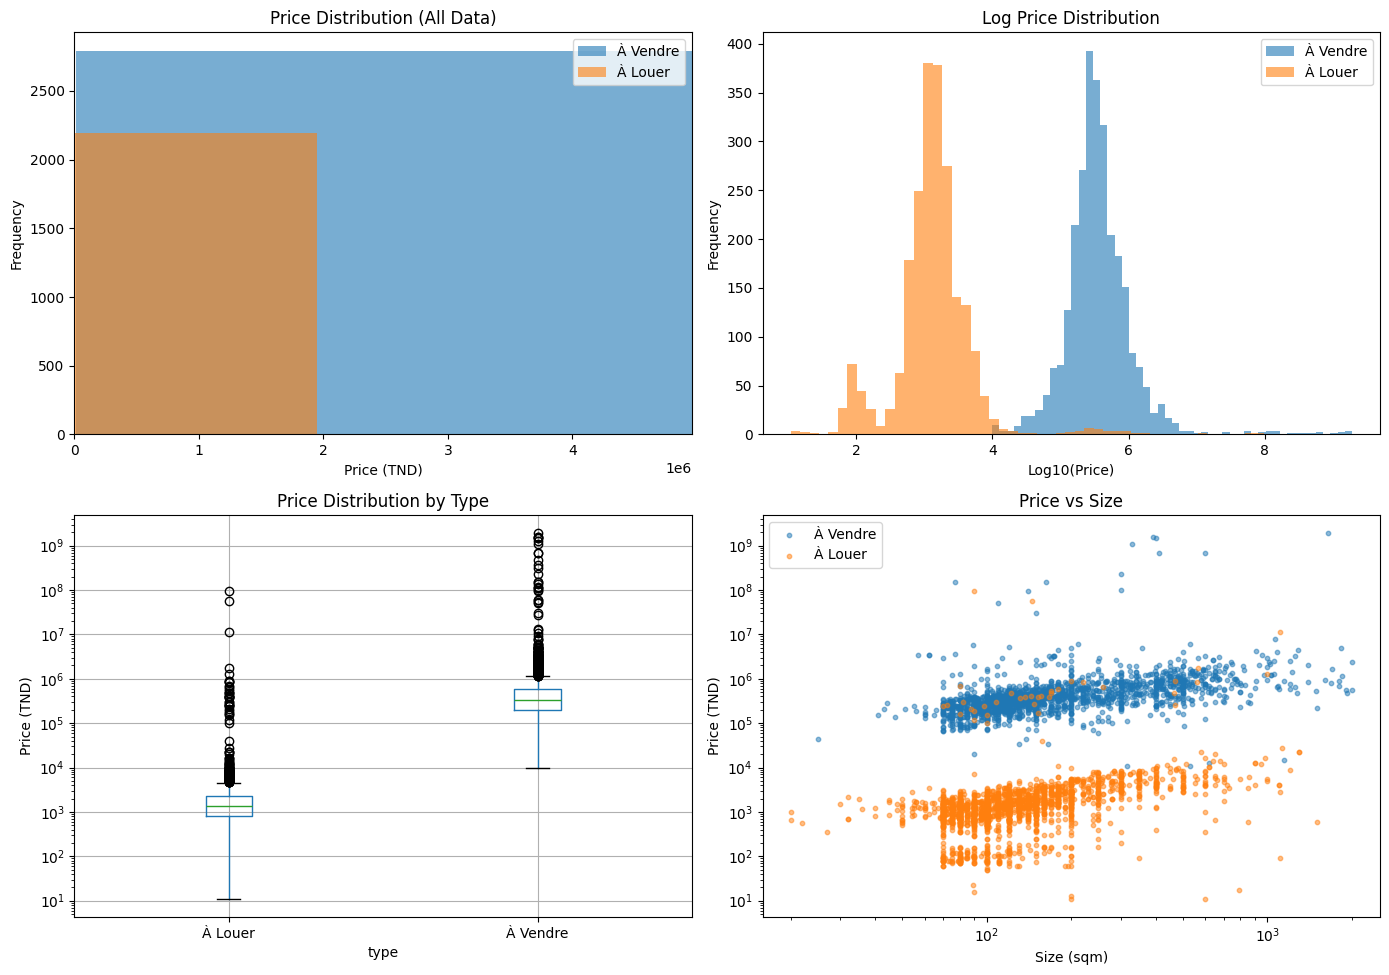


RECOMMENDED FILTERING THRESHOLDS

À Vendre:
  IQR method (1.5x): -385,750 to 1,176,250 TND
    Would remove: 281 properties (10.0%)
  Conservative (3x): -971,500 to 1,762,000 TND
    Would remove: 156 properties (5.5%)

À Louer:
  IQR method (1.5x): -1,450 to 4,550 TND
    Would remove: 194 properties (8.8%)
  Conservative (3x): -3,700 to 6,800 TND
    Would remove: 103 properties (4.7%)

SUGGESTED MARKET-BASED THRESHOLDS

Based on Tunisian real estate market:
  À Vendre: 10,000 to 10,000,000 TND (reasonable property range)
  À Louer:  100 to 50,000 TND (monthly rent range)

IMPACT OF FILTERING

Original dataset: 5009 properties
Filtered dataset: 4856 properties
Removed: 153 properties (3.05%)

By type:
  À Vendre: 2812 → 2782 (removed 30, 1.07%)
  À Louer: 2197 → 2074 (removed 123, 5.60%)

✅ Filtered dataset saved to '../data/clean/cleaned_data_filtered.csv'

FILTERED DATA STATISTICS

À Vendre (n=2782):
  Min:     10,000 TND
  Median:  335,000 TND
  Mean:    534,250 TND
  Max:     9,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/clean/cleaned_data.csv")

print("=" * 70)
print("DATA QUALITY ANALYSIS")
print("=" * 70)

# Basic statistics
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Price statistics by type
print("\n" + "=" * 70)
print("PRICE STATISTICS BY TYPE")
print("=" * 70)

for prop_type in df['type'].unique():
    subset = df[df['type'] == prop_type]
    print(f"\n{prop_type} (n={len(subset)}):")
    print(f"  Min:     {subset['price'].min():,.0f} TND")
    print(f"  Q1:      {subset['price'].quantile(0.25):,.0f} TND")
    print(f"  Median:  {subset['price'].median():,.0f} TND")
    print(f"  Mean:    {subset['price'].mean():,.0f} TND")
    print(f"  Q3:      {subset['price'].quantile(0.75):,.0f} TND")
    print(f"  Max:     {subset['price'].max():,.0f} TND")
    print(f"  Std Dev: {subset['price'].std():,.0f} TND")

# Identify extreme outliers
print("\n" + "=" * 70)
print("EXTREME OUTLIERS (Top 10 highest prices)")
print("=" * 70)
extreme_outliers = df.nlargest(10, 'price')[['price', 'type', 'category', 'location', 
                                               'room_count', 'bathroom_count', 'size']]
print(extreme_outliers.to_string(index=False))

# Check for properties over 10 million
print(f"\n⚠️  Properties over 10,000,000 TND: {(df['price'] > 10_000_000).sum()}")
print(f"⚠️  Properties over 100,000,000 TND: {(df['price'] > 100_000_000).sum()}")
print(f"⚠️  Properties over 1,000,000,000 TND: {(df['price'] > 1_000_000_000).sum()}")

# Visualization of price distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Overall price distribution (with outliers)
for prop_type in df['type'].unique():
    subset = df[df['type'] == prop_type]['price']
    axes[0, 0].hist(subset, bins=50, alpha=0.6, label=prop_type)
axes[0, 0].set_xlabel('Price (TND)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution (All Data)')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, df['price'].quantile(0.99))

# 2. Log price distribution
for prop_type in df['type'].unique():
    subset = df[df['type'] == prop_type]['log_price']
    axes[0, 1].hist(subset, bins=50, alpha=0.6, label=prop_type)
axes[0, 1].set_xlabel('Log10(Price)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Log Price Distribution')
axes[0, 1].legend()

# 3. Box plot by type
df.boxplot(column='price', by='type', ax=axes[1, 0])
axes[1, 0].set_ylabel('Price (TND)')
axes[1, 0].set_title('Price Distribution by Type')
axes[1, 0].set_yscale('log')
axes[1, 0].get_figure().suptitle('')

# 4. Price vs Size scatter
for prop_type in df['type'].unique():
    subset = df[df['type'] == prop_type]
    axes[1, 1].scatter(subset['size'], subset['price'], alpha=0.5, label=prop_type, s=10)
axes[1, 1].set_xlabel('Size (sqm)')
axes[1, 1].set_ylabel('Price (TND)')
axes[1, 1].set_title('Price vs Size')
axes[1, 1].set_yscale('log')
axes[1, 1].set_xscale('log')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# RECOMMENDATION: Define reasonable price ranges
print("\n" + "=" * 70)
print("RECOMMENDED FILTERING THRESHOLDS")
print("=" * 70)

# Calculate IQR-based outlier detection
for prop_type in df['type'].unique():
    subset = df[df['type'] == prop_type]['price']
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    # Standard outlier definition: Q1 - 1.5*IQR to Q3 + 1.5*IQR
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    # More conservative: Q1 - 3*IQR to Q3 + 3*IQR
    lower_extreme = Q1 - 3 * IQR
    upper_extreme = Q3 + 3 * IQR
    
    outliers_iqr = ((subset < lower_fence) | (subset > upper_fence)).sum()
    outliers_extreme = ((subset < lower_extreme) | (subset > upper_extreme)).sum()
    
    print(f"\n{prop_type}:")
    print(f"  IQR method (1.5x): {lower_fence:,.0f} to {upper_fence:,.0f} TND")
    print(f"    Would remove: {outliers_iqr} properties ({outliers_iqr/len(subset)*100:.1f}%)")
    print(f"  Conservative (3x): {lower_extreme:,.0f} to {upper_extreme:,.0f} TND")
    print(f"    Would remove: {outliers_extreme} properties ({outliers_extreme/len(subset)*100:.1f}%)")

# Suggest reasonable market-based thresholds
print("\n" + "=" * 70)
print("SUGGESTED MARKET-BASED THRESHOLDS")
print("=" * 70)
print("\nBased on Tunisian real estate market:")
print("  À Vendre: 10,000 to 10,000,000 TND (reasonable property range)")
print("  À Louer:  100 to 50,000 TND (monthly rent range)")

# Apply suggested filters and show impact
print("\n" + "=" * 70)
print("IMPACT OF FILTERING")
print("=" * 70)

# Define filters
vendre_min, vendre_max = 10_000, 10_000_000
louer_min, louer_max = 100, 50_000

df_filtered = df.copy()
vendre_mask = (df_filtered['type'] == 'À Vendre') & \
              (df_filtered['price'] >= vendre_min) & \
              (df_filtered['price'] <= vendre_max)
louer_mask = (df_filtered['type'] == 'À Louer') & \
             (df_filtered['price'] >= louer_min) & \
             (df_filtered['price'] <= louer_max)

df_filtered = df_filtered[vendre_mask | louer_mask]

print(f"\nOriginal dataset: {len(df)} properties")
print(f"Filtered dataset: {len(df_filtered)} properties")
print(f"Removed: {len(df) - len(df_filtered)} properties ({(len(df) - len(df_filtered))/len(df)*100:.2f}%)")

print("\nBy type:")
for prop_type in df['type'].unique():
    original_count = (df['type'] == prop_type).sum()
    filtered_count = (df_filtered['type'] == prop_type).sum()
    removed = original_count - filtered_count
    print(f"  {prop_type}: {original_count} → {filtered_count} (removed {removed}, {removed/original_count*100:.2f}%)")

# Save filtered dataset
df_filtered.to_csv('../data/clean/cleaned_data_filtered.csv', index=False)
print(f"\n✅ Filtered dataset saved to '../data/clean/cleaned_data_filtered.csv'")

# Show new statistics
print("\n" + "=" * 70)
print("FILTERED DATA STATISTICS")
print("=" * 70)

for prop_type in df_filtered['type'].unique():
    subset = df_filtered[df_filtered['type'] == prop_type]
    print(f"\n{prop_type} (n={len(subset)}):")
    print(f"  Min:     {subset['price'].min():,.0f} TND")
    print(f"  Median:  {subset['price'].median():,.0f} TND")
    print(f"  Mean:    {subset['price'].mean():,.0f} TND")
    print(f"  Max:     {subset['price'].max():,.0f} TND")
    print(f"  Std Dev: {subset['price'].std():,.0f} TND")

In [3]:
df['category'].unique()

array(['Appartements', 'Terrains et Fermes', 'Bureaux et Plateaux',
       'Maisons et Villas', 'Locations de vacances', 'Colocations'],
      dtype=object)